In [2]:
import numpy as np
import sympy as sp
from scipy import integrate
import matplotlib.pyplot as plt
import time as tm

from sympy import oo
from __future__ import division

sp.init_printing()
%matplotlib inline

r = sp.Symbol('r', positive=True)
k = sp.Symbol('k', positive=True)
l = sp.Symbol('l', positive=True, integer=True)
n = sp.Symbol('n', positive=True, integer=True)
z = sp.Symbol('z', positive=True, integer=True)

# Defino la funcion de onda radial

In [3]:
def R_hyp(n,l,z,r):
    rho = 2 * r * z / n
    rnum = (2 * z / n)**3 * sp.factorial(n + l)
    rden = (sp.factorial(2*l+1))**2 * 2*n * sp.factorial(n-l-1)
    rnorm = sp.sqrt(rnum/rden)
    rfunc = (rho)**l * sp.exp(-rho/2) * sp.hyper((-n+l+1,), (2*l+2,), (rho))
    R = rnorm * rfunc
    return R

# Defino los vectores para el plot

In [7]:
nlen = 500
xmax = 10.0
xmin = 0.0
x = np.linspace(xmin,xmax,nlen)
psi_1 = np.zeros(nlen)
psi_2 = np.zeros(nlen)

# Evaluo para n = 1, l = 0, Z = 4

In [8]:
for i in range(nlen):
    psi_1[i] = R_hyp(1,0,4,x[i])

# Plot para n = 1, l = 0, Z = 4

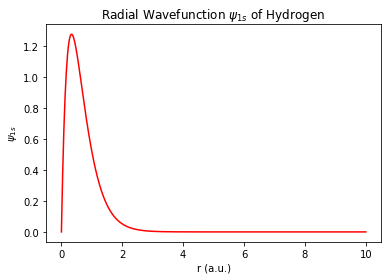

In [9]:
plt.plot(x, x*psi_1,'r')
plt.title("Radial Wavefunction $\psi_{1s}$ of Hydrogen")
plt.xlabel("r (a.u.)")
plt.ylabel("$\psi_{1s}$")
plt.show()

# Evaluo para n = 2, l = 1, Z = 4

In [10]:
for i in range(nlen):
    psi_2[i] = R_hyp(2,1,4,x[i])

# Plot para n = 2, l = 1, Z = 4

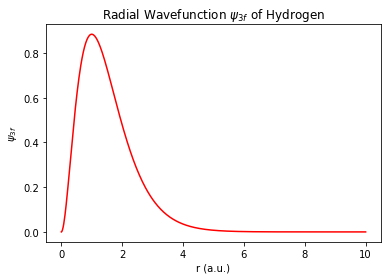

In [11]:
plt.plot(x, x*psi_2,'r')
plt.title("Radial Wavefunction $\psi_{3f}$ of Hydrogen")
plt.xlabel("r (a.u.)")
plt.ylabel("$\psi_{3f}$")
plt.show()

# Chequeo ortonormalidad

In [19]:
sp.integrate( (r**2*R_hyp(2,1,4,r)*R_hyp(1,0,4,r)), (r,0,oo)).evalf()

- La parte radial no es ortogonal porque estoy en distintos niveles de energia

In [16]:
sp.integrate((r**2*R_hyp(2,1,4,r)**2), (r,0,oo)).evalf()

In [17]:
sp.integrate((r**2*R_hyp(1,0,4,r)**2), (r,0,oo)).evalf()

- Las funciones estan normalizadas

# Calculo valores medios de r^k